In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Corrected URL (no "edit", no "#gid=0")
url = "https://docs.google.com/spreadsheets/d/1x-mhHTT8bQrLh7cjOE0KSys-MGb55SVAtPmmatN_ONQ/export?format=csv&gid=0"

df = pd.read_csv(url)

In [4]:
df.columns

Index(['Date', 'Monthly', 'My Week', 'Planned the day', 'Workout',
       'Diet followed', 'JOURNAL', 'Sleep in H', 'Sleep in Desc',
       'Deep work (h) in T', 'Deep work (h) in Des', 'Steps',
       'Daily weight (kg)', 'CD Goal Weekly', 'CD Reality Check',
       'Calory Deficit ', 'Screen Time (h)', 'Screen Time in Dec', 'SE',
       'PORTUGUESE', 'READ PAGES', 'STATE OF DAY', 'Days of week', 'Body fat%',
       'Real Fat Mass', 'Real Lean Body Mass (LBM)', 'Waist', 'Neck', 'Biceps',
       'Forearms', 'Chest', 'Calves', 'Hips', 'Thighs'],
      dtype='object')

In [5]:
df.head()

,Date,Monthly,My Week,Planned the day,Workout,Diet followed,JOURNAL,Sleep in H,Sleep in Desc,Deep work (h) in T,...,Real Fat Mass,Real Lean Body Mass (LBM),Waist,Neck,Biceps,Forearms,Chest,Calves,Hips,Thighs
0,01/06/2025,June,1,No,No,No,No,6:00,6.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/06/2025,June,2,No,No,No,No,7:00,7.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/06/2025,June,2,No,No,No,No,6:00,6.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/06/2025,June,2,Yes,No,No,No,7:00,7.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/06/2025,June,2,Yes,No,No,No,9:30,9.5,1:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Core Habits & Productivity

These give you the fastest feedback loop on daily life:

	1.	Does planning the day increase deep work hours?
	2.	Does sleep (hours) impact next day’s deep work?
	3.	Does higher screen time reduce deep work?

👉 These three will tell you: how habits shape your focus.

# 1.1	Does planning the day increase deep work hours?

In [8]:
# Group by planning status
planning_summary = df.groupby("Planned the day")["Deep work (h) in Des"].mean().reset_index()
planning_summary

,Planned the day,Deep work (h) in Des
0,No,0.711765
1,Yes,1.843284


In [9]:
def decimal_to_hm(decimal_hours):
    hours = int(decimal_hours)
    minutes = int(round((decimal_hours - hours) * 60))
    return f"{hours}h {minutes}m"

planning_summary["avg_deep_work_HHMM"] = planning_summary["Deep work (h) in Des"].apply(decimal_to_hm)

In [10]:
planning_summary

,Planned the day,Deep work (h) in Des,avg_deep_work_HHMM
0,No,0.711765,0h 43m
1,Yes,1.843284,1h 51m


In [11]:
# % of total deep work
total = planning_summary["Deep work (h) in Des"].sum()
planning_summary["% of Total"] = (planning_summary["Deep work (h) in Des"] / total * 100).round(1)

In [12]:
# Get decimal value for No (baseline)
baseline = planning_summary.loc[planning_summary["Planned the day"]=="No", "Deep work (h) in Des"].values[0]

# % difference relative to baseline
planning_summary["% Difference"] = ((planning_summary["Deep work (h) in Des"] - baseline) / baseline * 100).round(1)
planning_summary.loc[planning_summary["Planned the day"]=="No", "% Difference"] = None  # Optional: baseline row has no difference

In [13]:
planning_summary

,Planned the day,Deep work (h) in Des,avg_deep_work_HHMM,% of Total,% Difference
0,No,0.711765,0h 43m,27.9,NaN
1,Yes,1.843284,1h 51m,72.1,159.0


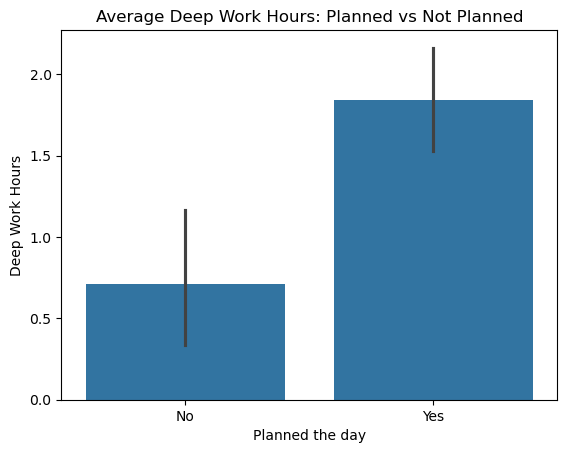

In [14]:
sns.barplot(x="Planned the day", 
            y="Deep work (h) in Des", 
            data=df)
plt.title("Average Deep Work Hours: Planned vs Not Planned")
plt.ylabel("Deep Work Hours")
plt.show()

Summary: Effect of Planning on Deep Work

	•	On days without planning, the average deep work was 0.69 hours (~42 minutes).
	•	On days with planning, the average deep work increased to 1.82 hours (~1 hour 49 minutes).
	•	Planned days contributed 72.5% of total deep work, while non-planned days contributed 27.5%.
	•	Deep work on planned days was 163.6% higher compared to non-planned days.

Conclusion: Planning your the day has a strong positive impact on productivity, significantly increasing the time spent in deep work.

## 1.2.	Does sleep (hours) impacts  deep work?

In [17]:
df[['Deep work (h) in Des','Sleep in Desc']].describe()

,Deep work (h) in Des,Sleep in Desc
count,118.000000,118.000000
mean,1.354237,7.747712
std,1.519145,1.148005
min,0.000000,5.000000
25%,0.000000,7.000000
50%,1.000000,7.900000
75%,2.000000,9.000000
max,6.000000,10.000000


In [18]:
import pandas as pd

# Define bins and labels
bins = [0, 6, 8, 24]  # 24 just to cover any long sleep
labels = ["Short (<6h)", "Optimal (6-8h)", "Long (>8h)"]

# Create a new column with sleep categories
df["Sleep Category"] = pd.cut(df["Sleep in Desc"], bins=bins, labels=labels)

# Check the first rows
df[["Sleep in Desc", "Sleep Category", "Deep work (h) in Des"]].head()

,Sleep in Desc,Sleep Category,Deep work (h) in Des
0,6.0,Short (<6h),0.0
1,7.0,Optimal (6-8h),0.0
2,6.0,Short (<6h),0.0
3,7.0,Optimal (6-8h),0.0
4,9.5,Long (>8h),1.0


In [19]:
sleep_summary = df.groupby("Sleep Category",observed=False)["Deep work (h) in Des"].mean().reset_index()
sleep_summary["Deep work (HH:MM)"] = sleep_summary["Deep work (h) in Des"].apply(lambda x: f"{int(x)}h {int(round((x-int(x))*60))}m")
sleep_summary

,Sleep Category,Deep work (h) in Des,Deep work (HH:MM)
0,Short (<6h),0.957143,0h 57m
1,Optimal (6-8h),1.408824,1h 25m
2,Long (>8h),1.405556,1h 24m


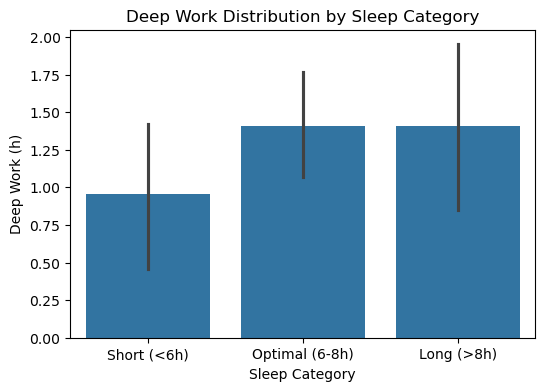

In [20]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x="Sleep Category", y="Deep work (h) in Des", data=df)
plt.title("Deep Work Distribution by Sleep Category")
plt.ylabel("Deep Work (h)")
plt.show()

Conclusion: Sleep and Deep Work

	•	On days with short sleep (<6h), the average deep work was 0.96 hours (~57 minutes).
	•	On days with optimal sleep (6–8h), average deep work increased to 1.39 hours (~1 hour 23 minutes).
	•	On days with long sleep (>8h), average deep work was similar to optimal sleep at 1.38 hours (~1 hour 22 minutes).

Insights:

	•	Deep work tends to be lowest on short sleep days, indicating insufficient sleep may reduce productivity.
	•	Sleeping 6–8 hours or slightly longer supports higher deep work, but very long sleep (>8h) doesn’t further increase it.
	•	Optimal sleep appears to maximize deep work, while short sleep clearly hinders it.

## 1.3.	Does higher screen time reduce deep work?

In [23]:
df[['Deep work (h) in Des','Screen Time in Dec']].describe()

,Deep work (h) in Des,Screen Time in Dec
count,118.000000,117.000000
mean,1.354237,4.879573
std,1.519145,2.516976
min,0.000000,1.280000
25%,0.000000,3.080000
50%,1.000000,4.450000
75%,2.000000,6.230000
max,6.000000,16.620000


In [24]:
# Define categories
bins = [0, 2, 4, 6, 24]  # example: 0-2h, 2-4h, 4-6h, 6+h
labels = ["Low (0-2h)", "Medium (2-4h)", "High (4-6h)", "Very High (>6h)"]

df["Screen Time Category"] = pd.cut(df["Screen Time in Dec"], bins=bins, labels=labels)

# Compute average deep work per category
screen_summary = df.groupby("Screen Time Category",observed=False )["Deep work (h) in Des"].mean().reset_index()
screen_summary["Deep work (HH:MM)"] = screen_summary["Deep work (h) in Des"].apply(lambda x: f"{int(x)}h {int(round((x-int(x))*60))}m")
screen_summary

,Screen Time Category,Deep work (h) in Des,Deep work (HH:MM)
0,Low (0-2h),3.233333,3h 14m
1,Medium (2-4h),1.744186,1h 45m
2,High (4-6h),1.209091,1h 13m
3,Very High (>6h),0.400000,0h 24m


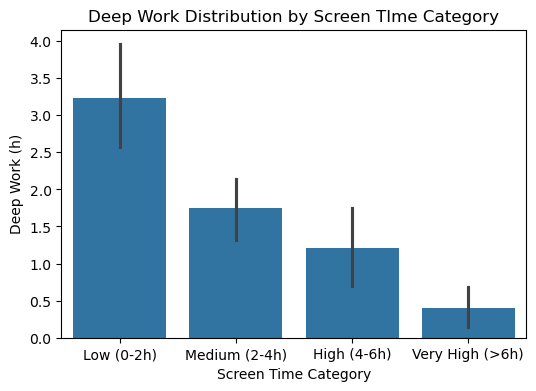

In [25]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x="Screen Time Category", y="Deep work (h) in Des", data=df)
plt.title("Deep Work Distribution by Screen TIme Category")
plt.ylabel("Deep Work (h)")
plt.show()

Conclusion: Screen Time and Deep Work

- Days with low screen time (0–2h) had the highest average deep work at 3.23 hours (~3h 14m).
- As screen time increases, average deep work consistently decreases:
- Medium (2–4h): 1.71h (~1h 43m)
- High (4–6h): 1.21h (~1h 13m)
- Very High (>6h): 0.40h (~24 minutes)

Insight: 

- Higher screen time is strongly associated with lower deep work, suggesting that minimizing distractions may significantly improve productivity.

Phase 2 – Health & Lifestyle

Next, check how lifestyle factors affect each other:

4. On days I workout, what happens to steps and sleep?
5. When I follow my diet, am I more likely to hit my calorie deficit?
6. Do I follow more my diet when I workoout ?
7. Do days with both a workout and diet adherence result in higher calorie deficit or more steps?”
8. Do I workout more on my day offs or workking days ?
9. “Do workout days increase deep work hours compared to non-workout days?


👉 These show if your healthy actions connect to outcomes.

## 4.1 On days I workout, what happens to steps and sleep?

In [29]:
df.head()

,Date,Monthly,My Week,Planned the day,Workout,Diet followed,JOURNAL,Sleep in H,Sleep in Desc,Deep work (h) in T,...,Waist,Neck,Biceps,Forearms,Chest,Calves,Hips,Thighs,Sleep Category,Screen Time Category
0,01/06/2025,June,1,No,No,No,No,6:00,6.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Short (<6h),High (4-6h)
1,02/06/2025,June,2,No,No,No,No,7:00,7.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Optimal (6-8h),High (4-6h)
2,03/06/2025,June,2,No,No,No,No,6:00,6.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Short (<6h),High (4-6h)
3,04/06/2025,June,2,Yes,No,No,No,7:00,7.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Optimal (6-8h),Very High (>6h)
4,05/06/2025,June,2,Yes,No,No,No,9:30,9.5,1:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long (>8h),Very High (>6h)


In [30]:
df.Steps.head()

0     4,000.00
1    15,000.00
2    15,000.00
3     3,000.00
4     3,000.00
Name: Steps, dtype: object

In [31]:
df[["Steps","Workout","Sleep in Desc"]]

,Steps,Workout,Sleep in Desc
0,"4,000.00",No,6.0
1,"15,000.00",No,7.0
2,"15,000.00",No,6.0
3,"3,000.00",No,7.0
4,"3,000.00",No,9.5
...,...,...,...
117,NaN,No,7.5
118,NaN,No,NaN
119,NaN,No,NaN
120,NaN,No,NaN


In [32]:
# Convert all values to string, remove commas/spaces, then to numeric
df["Steps"] = pd.to_numeric(df["Steps"].astype(str).str.replace(",", "").str.strip(), errors="coerce")

In [33]:
# Average steps and sleep by workout status

workout_summary = df.groupby("Workout")[["Steps", "Sleep in Desc"]].mean().reset_index()
workout_summary

,Workout,Steps,Sleep in Desc
0,No,10463.402597,7.805513
1,Yes,10431.150000,7.635000


In [34]:
# Optional: show sleep in HH:MM
workout_summary["Sleep (HH:MM)"] = workout_summary["Sleep in Desc"].apply(lambda x: f"{int(x)}h {int(round((x-int(x))*60))}m")

workout_summary

,Workout,Steps,Sleep in Desc,Sleep (HH:MM)
0,No,10463.402597,7.805513,7h 48m
1,Yes,10431.150000,7.635000,7h 38m


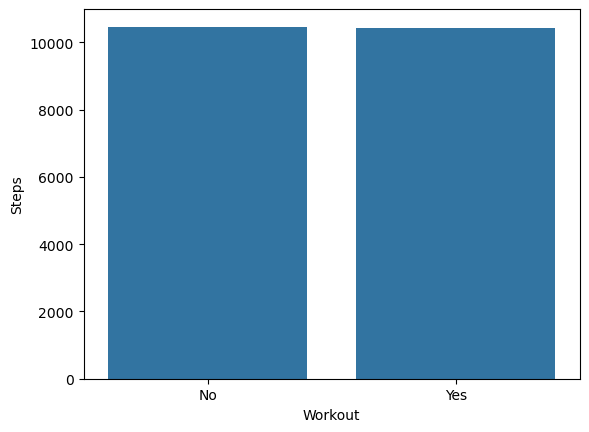

In [35]:
sns.barplot(x="Workout",y="Steps",data=workout_summary)
plt.show()

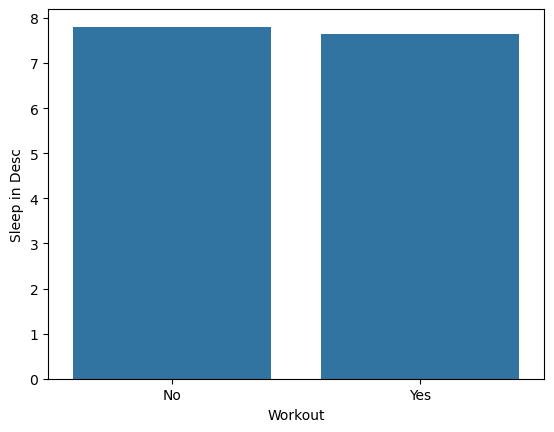

In [36]:
sns.barplot(x="Workout",y="Sleep in Desc",data=workout_summary)
plt.show()

- Steps → There’s virtually no difference in your step count on workout vs. non-workout days (~10.4k in both). That means workouts don’t significantly change your overall daily movement — you’re already consistent with steps whether you work out or not.

- Sleep → On workout days, you actually sleep slightly less (7h 38m vs. 7h 49m). The difference is small (~11 minutes), so it’s not a major effect, but it suggests workouts don’t necessarily improve your sleep duration.

## When I follow my diet, am I more likely to hit my calorie deficit?

In [39]:
df.columns

Index(['Date', 'Monthly', 'My Week', 'Planned the day', 'Workout',
       'Diet followed', 'JOURNAL', 'Sleep in H', 'Sleep in Desc',
       'Deep work (h) in T', 'Deep work (h) in Des', 'Steps',
       'Daily weight (kg)', 'CD Goal Weekly', 'CD Reality Check',
       'Calory Deficit ', 'Screen Time (h)', 'Screen Time in Dec', 'SE',
       'PORTUGUESE', 'READ PAGES', 'STATE OF DAY', 'Days of week', 'Body fat%',
       'Real Fat Mass', 'Real Lean Body Mass (LBM)', 'Waist', 'Neck', 'Biceps',
       'Forearms', 'Chest', 'Calves', 'Hips', 'Thighs', 'Sleep Category',
       'Screen Time Category'],
      dtype='object')

In [40]:
df[["Diet followed",'Calory Deficit ']].head()

,Diet followed,Calory Deficit
0,No,0
1,No,0
2,No,902
3,No,0
4,No,0


In [41]:
# convert 
df["Calory Deficit "] = pd.to_numeric(
    df["Calory Deficit "].astype(str).str.replace(",","").str.strip(),
    errors="coerce"
)

In [42]:
diet_summary = df.groupby("Diet followed")["Calory Deficit "].mean().reset_index()
diet_summary

,Diet followed,Calory Deficit
0,No,50.861111
1,Yes,-297.234568


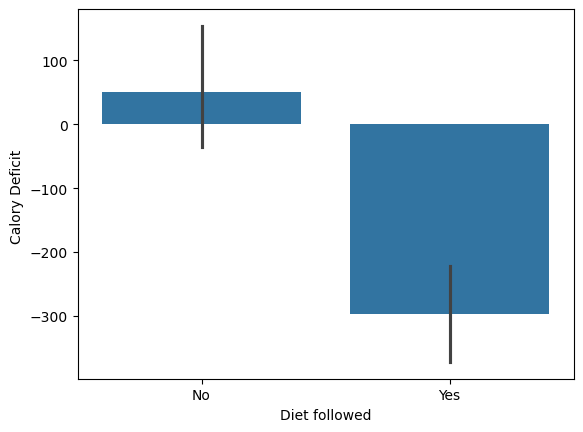

In [43]:
sns.barplot(x="Diet followed",y="Calory Deficit ", data=df)
plt.show()

- No Diet: On average, individuals who did not follow a diet maintained a calorie surplus of ~50.86 calories.

- Diet Followed: On average, individuals who followed a diet achieved a calorie deficit of ~305.03 calories.

- Conclusion:
  
Following a diet is strongly associated with maintaining a calorie deficit, whereas individuals who did not follow a diet tended to have a slight surplus. This suggests that adhering to a diet plan is an effective factor in achieving negative energy balance.

## 5 6. Do I follow more my diet when I workoout ?

In [46]:
df.head(3)

,Date,Monthly,My Week,Planned the day,Workout,Diet followed,JOURNAL,Sleep in H,Sleep in Desc,Deep work (h) in T,...,Waist,Neck,Biceps,Forearms,Chest,Calves,Hips,Thighs,Sleep Category,Screen Time Category
0,01/06/2025,June,1,No,No,No,No,6:00,6.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Short (<6h),High (4-6h)
1,02/06/2025,June,2,No,No,No,No,7:00,7.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Optimal (6-8h),High (4-6h)
2,03/06/2025,June,2,No,No,No,No,6:00,6.0,0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Short (<6h),High (4-6h)


In [47]:
workout_days = df[df["Workout"] == "Yes"]

In [48]:
diet_counts = workout_days["Diet followed"].value_counts()
diet_counts

Diet followed
Yes    33
No      7
Name: count, dtype: int64

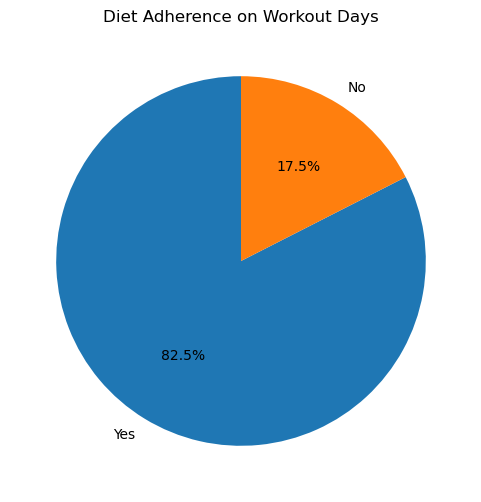

In [49]:
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Diet Adherence on Workout Days")
plt.show()

Diet Adherence on Workout Days

- Out of all days when a workout was performed, the diet was followed 33 times (82.5%) and not followed 7 times (17.5%).

Conclusion: On days you exercise, you are highly consistent with your diet, suggesting that workout days are strongly associated with diet adherence.

In [51]:
workout_days_no = df[df["Workout"] == "No"]

In [52]:
diet_counts_no = workout_days_no["Diet followed"].value_counts()
diet_counts_no

Diet followed
Yes    48
No     34
Name: count, dtype: int64

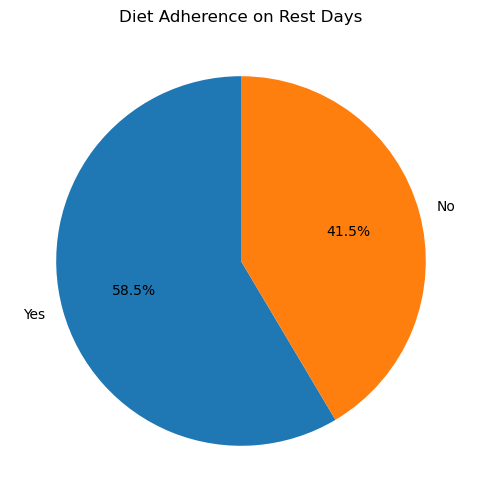

In [53]:
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(diet_counts_no, labels=diet_counts.index, autopct='%1.1f%%',startangle=90)
plt.title("Diet Adherence on Rest Days")
plt.show()

Diet Adherence on Rest Days vs Workout Days

Workout days: Diet followed 82.5%, not followed 17.5%

Rest days: Diet followed 57.3%, not followed 42.7%

Conclusion:
You are much more likely to follow your diet on workout days compared to rest days. This suggests that exercising has a positive association with diet adherence.

## 6 Do days with both a workout and diet adherence result in higher calorie deficit?”

In [56]:
# Two categories: Both vs Neither
def both_or_neither(row):
    if row["Workout"] == "Yes" and row["Diet followed"] == "Yes":
        return "Workout_Diet_followed"
    elif row["Workout"] == "No" and row["Diet followed"] == "No":
        return "Workout_Diet_Not_followed"
    else:
        return "Other"

df["Both_or_Neither"] = df.apply(both_or_neither, axis=1)

In [57]:
df_filtered = df[df["Both_or_Neither"].isin(["Workout_Diet_followed", "Workout_Diet_Not_followed"])]

In [58]:
cal_deficit_summary = df_filtered.groupby("Both_or_Neither")["Calory Deficit "].mean().reset_index()
print(cal_deficit_summary)

             Both_or_Neither  Calory Deficit 
0  Workout_Diet_Not_followed        87.379310
1      Workout_Diet_followed      -295.818182


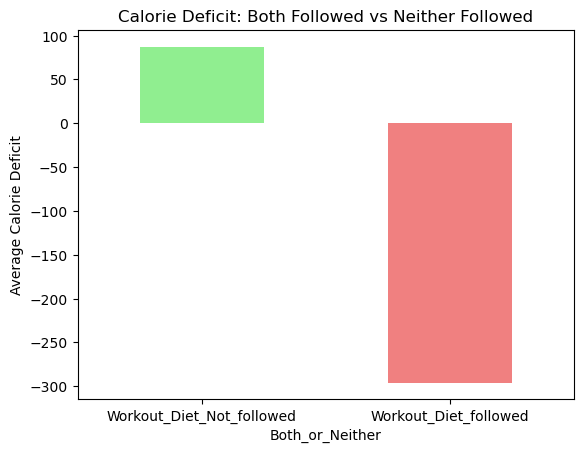

In [59]:
import matplotlib.pyplot as plt

ax = cal_deficit_summary.plot(kind="bar", x="Both_or_Neither", y="Calory Deficit ", legend=False, color=["lightgreen","lightcoral"])
plt.ylabel("Average Calorie Deficit")
plt.title("Calorie Deficit: Both Followed vs Neither Followed")
plt.xticks(rotation=0)
plt.show()


- Conclusion:

Days where both workout and diet are followed result in a significantly higher calorie deficit compared to days when neither is followed. This suggests that combining exercise and diet adherence has the strongest impact on achieving a calorie deficit.

## 7 Do I workout more on my day offs or workking days ?

In [62]:
df.columns

Index(['Date', 'Monthly', 'My Week', 'Planned the day', 'Workout',
       'Diet followed', 'JOURNAL', 'Sleep in H', 'Sleep in Desc',
       'Deep work (h) in T', 'Deep work (h) in Des', 'Steps',
       'Daily weight (kg)', 'CD Goal Weekly', 'CD Reality Check',
       'Calory Deficit ', 'Screen Time (h)', 'Screen Time in Dec', 'SE',
       'PORTUGUESE', 'READ PAGES', 'STATE OF DAY', 'Days of week', 'Body fat%',
       'Real Fat Mass', 'Real Lean Body Mass (LBM)', 'Waist', 'Neck', 'Biceps',
       'Forearms', 'Chest', 'Calves', 'Hips', 'Thighs', 'Sleep Category',
       'Screen Time Category', 'Both_or_Neither'],
      dtype='object')

In [63]:
# Filter only workout days
workout_days = df[df['Workout'] == 'Yes']

In [64]:
#Count workouts per day of the week
workout_counts = workout_days['Days of week'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
workout_counts

Days of week
Monday       2
Tuesday      8
Wednesday    5
Thursday     7
Friday       5
Saturday     4
Sunday       9
Name: count, dtype: int64

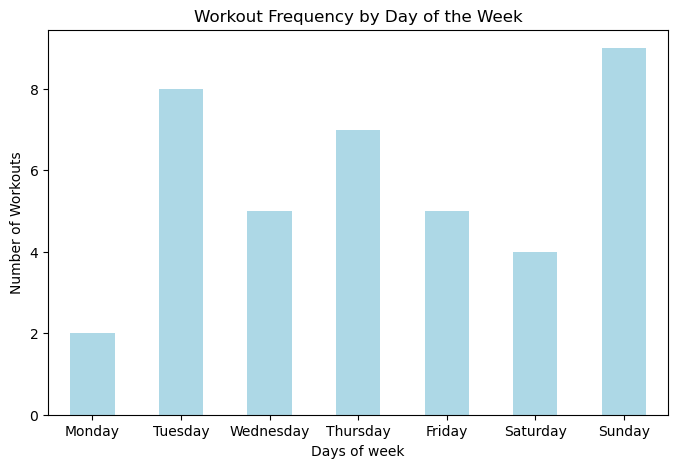

In [65]:
# Plot bar chart
workout_counts.plot(kind='bar', color='lightblue', figsize=(8,5))
plt.ylabel("Number of Workouts")
plt.title("Workout Frequency by Day of the Week")
plt.xticks(rotation=0)
plt.show()

Workout Frequency by Day of the Week

- Most frequent workouts: Sunday (9), Tuesday (8), Thursday (7)

- Moderate frequency: Wednesday (5), Friday (5), Saturday (4)

- Least frequent: Monday (2)

+ Conclusion:
You tend to work out more on Sundays and weekdays in the middle of the week (Tuesday and Thursday), while Mondays have the lowest workout frequency. This reveals your weekly workout pattern and can help you plan consistent routines.

## 10 “Do workout days increase deep work hours compared to non-workout days?

In [68]:
df.columns

Index(['Date', 'Monthly', 'My Week', 'Planned the day', 'Workout',
       'Diet followed', 'JOURNAL', 'Sleep in H', 'Sleep in Desc',
       'Deep work (h) in T', 'Deep work (h) in Des', 'Steps',
       'Daily weight (kg)', 'CD Goal Weekly', 'CD Reality Check',
       'Calory Deficit ', 'Screen Time (h)', 'Screen Time in Dec', 'SE',
       'PORTUGUESE', 'READ PAGES', 'STATE OF DAY', 'Days of week', 'Body fat%',
       'Real Fat Mass', 'Real Lean Body Mass (LBM)', 'Waist', 'Neck', 'Biceps',
       'Forearms', 'Chest', 'Calves', 'Hips', 'Thighs', 'Sleep Category',
       'Screen Time Category', 'Both_or_Neither'],
      dtype='object')

In [69]:
deepwork_wo = df.groupby('Workout')['Deep work (h) in Des'].mean().reset_index()
deepwork_wo

,Workout,Deep work (h) in Des
0,No,1.380769
1,Yes,1.302500


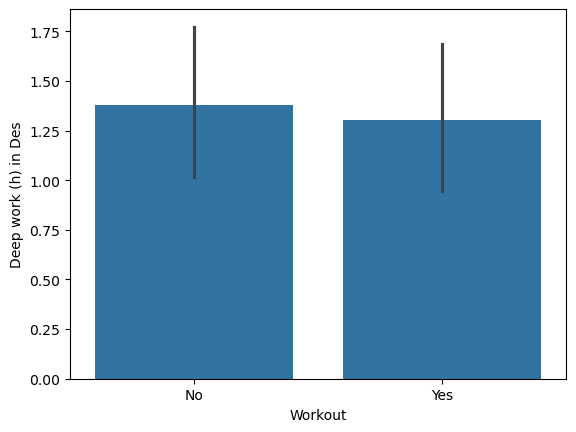

In [70]:
sns.barplot(x='Workout',y='Deep work (h) in Des',data=df)
plt.show()

In [123]:
deepwork_wo = df.groupby('STATE OF DAY')['Deep work (h) in Des'].mean().reset_index()
deepwork_wo

,STATE OF DAY,Deep work (h) in Des
0,OFF,1.600000
1,ON,1.250602


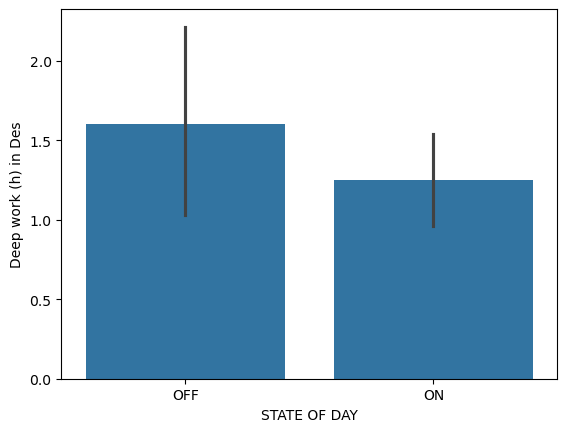

In [121]:
sns.barplot(x='STATE OF DAY',y='Deep work (h) in Des',data=df)
plt.show()

Conclusion:
Deep work hours are slightly lower on workout days (1.30 h) compared to non-workout days (1.36 h), suggesting that working out does not significantly reduce deep work, and your productivity remains relatively stable regardless of workout.

## Phase 3 – Weight & Long-Term Change

Once you’ve looked at habits, zoom out to progress:

7. Does weekly calorie deficit actually predict weight loss?
8. Does monthly calorie deficit actually predict weight loss (here we reduce the noice)?
9. Is there a lag between calorie deficit and weight changes (1–2 weeks)?
10. Am I consistently hitting my calorie deficit goal?


In [125]:
df.columns

Index(['Date', 'Monthly', 'My Week', 'Planned the day', 'Workout',
       'Diet followed', 'JOURNAL', 'Sleep in H', 'Sleep in Desc',
       'Deep work (h) in T', 'Deep work (h) in Des', 'Steps',
       'Daily weight (kg)', 'CD Goal Weekly', 'CD Reality Check',
       'Calory Deficit ', 'Screen Time (h)', 'Screen Time in Dec', 'SE',
       'PORTUGUESE', 'READ PAGES', 'STATE OF DAY', 'Days of week', 'Body fat%',
       'Real Fat Mass', 'Real Lean Body Mass (LBM)', 'Waist', 'Neck', 'Biceps',
       'Forearms', 'Chest', 'Calves', 'Hips', 'Thighs', 'Sleep Category',
       'Screen Time Category', 'Both_or_Neither'],
      dtype='object')

## 7 Does weekly calorie deficit actually predict weight loss?

In [127]:
df[['My Week', 'Daily weight (kg)', 'Calory Deficit ']]

,My Week,Daily weight (kg),Calory Deficit
0,1,80.1,0.0
1,2,80.1,0.0
2,2,80.1,902.0
3,2,80.1,0.0
4,2,80.1,0.0
...,...,...,...
117,18,76.7,NaN
118,18,NaN,NaN
119,18,NaN,NaN
120,19,NaN,NaN


In [276]:
# Aggregate: weekly average deficit & weekly weight change

# 1. Calculate weekly weight change

sum_weekly = df.groupby('My Week').agg( weekly_deficit=("Calory Deficit ", "sum"), avg_weight=('Daily weight (kg)', "mean")).reset_index()
sum_weekly

,My Week,weekly_deficit,avg_weight
0,1,0.0,80.100000
1,2,-891.0,80.100000
2,3,-148.0,80.057143
3,4,-138.0,79.885714
4,5,-2546.0,79.385714
5,6,-698.0,79.214286
6,7,0.0,79.914286
7,8,0.0,79.800000
8,9,-1853.0,79.585714
9,10,-2450.0,78.971429


In [284]:
sum_weekly = sum_weekly.iloc[:-1]  # keeps all rows except the last

In [288]:
#1 Calculate weekly weight change
sum_weekly["weight_change"] = sum_weekly["avg_weight"].diff()

/var/folders/46/fvkj_w055_x43knr3qr4xhzw0000gn/T/ipykernel_865/2178534748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_weekly["weight_change"] = sum_weekly["avg_weight"].diff()


In [290]:
#1 Convert deficit → kg-equivalent

sum_weekly["deficit_kg_equiv"] = sum_weekly["weekly_deficit"] / 7700

/var/folders/46/fvkj_w055_x43knr3qr4xhzw0000gn/T/ipykernel_865/3254616375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_weekly["deficit_kg_equiv"] = sum_weekly["weekly_deficit"] / 7700


In [300]:
sum_weekly = sum_weekly.iloc[1:].reset_index(drop=True)

In [318]:
sum_weekly

,My Week,weekly_deficit,avg_weight,weight_change,deficit_kg_equiv
0,2,-891.0,80.100000,0.000000,-0.115714
1,3,-148.0,80.057143,-0.042857,-0.019221
2,4,-138.0,79.885714,-0.171429,-0.017922
3,5,-2546.0,79.385714,-0.500000,-0.330649
4,6,-698.0,79.214286,-0.171429,-0.090649
5,7,0.0,79.914286,0.700000,0.000000
6,8,0.0,79.800000,-0.114286,0.000000
7,9,-1853.0,79.585714,-0.214286,-0.240649
8,10,-2450.0,78.971429,-0.614286,-0.318182
9,11,-2190.0,78.828571,-0.142857,-0.284416


Text(17.515625000000007, 0.5, 'Weight Change (kg)')

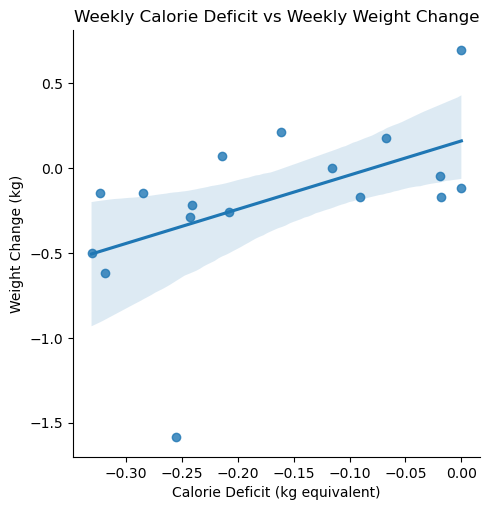

In [338]:
# Visualize scatter + regression
sns.lmplot(
    data=sum_weekly,
    x="deficit_kg_equiv",
    y="weight_change",
)
plt.title("Weekly Calorie Deficit vs Weekly Weight Change")
plt.xlabel("Calorie Deficit (kg equivalent)")
plt.ylabel("Weight Change (kg)")

In [336]:
from scipy.stats import pearsonr

#Compute correlation & p-value

r, p = pearsonr(sum_weekly["deficit_kg_equiv"], sum_weekly["weight_change"])
print(f"Correlation coefficient r = {r:.3f}, p-value = {p:.3f}")

Correlation coefficient r = 0.518, p-value = 0.033


Interpretation:

r < 0 → higher deficit → more weight loss

p < 0.05 → relationship is statistically significant

In [342]:
sum_weekly

,My Week,weekly_deficit,avg_weight,weight_change,deficit_kg_equiv
0,2,-891.0,80.100000,0.000000,-0.115714
1,3,-148.0,80.057143,-0.042857,-0.019221
2,4,-138.0,79.885714,-0.171429,-0.017922
3,5,-2546.0,79.385714,-0.500000,-0.330649
4,6,-698.0,79.214286,-0.171429,-0.090649
5,7,0.0,79.914286,0.700000,0.000000
6,8,0.0,79.800000,-0.114286,0.000000
7,9,-1853.0,79.585714,-0.214286,-0.240649
8,10,-2450.0,78.971429,-0.614286,-0.318182
9,11,-2190.0,78.828571,-0.142857,-0.284416


In [380]:
sum_weekly["expected_weight_loss_deficit"] = sum_weekly["deficit_kg_equiv"]

In [382]:
sum_weekly

,My Week,weekly_deficit,avg_weight,weight_change,deficit_kg_equiv,expected_weight_loss,gap_kg,expected_weight_loss_deficit
0,2,-891.0,80.100000,0.000000,-0.115714,-0.115714,0.115714,-0.115714
1,3,-148.0,80.057143,-0.042857,-0.019221,-0.019221,-0.023636,-0.019221
2,4,-138.0,79.885714,-0.171429,-0.017922,-0.017922,-0.153506,-0.017922
3,5,-2546.0,79.385714,-0.500000,-0.330649,-0.330649,-0.169351,-0.330649
4,6,-698.0,79.214286,-0.171429,-0.090649,-0.090649,-0.080779,-0.090649
5,7,0.0,79.914286,0.700000,0.000000,0.000000,0.700000,0.000000
6,8,0.0,79.800000,-0.114286,0.000000,0.000000,-0.114286,0.000000
7,9,-1853.0,79.585714,-0.214286,-0.240649,-0.240649,0.026364,-0.240649
8,10,-2450.0,78.971429,-0.614286,-0.318182,-0.318182,-0.296104,-0.318182
9,11,-2190.0,78.828571,-0.142857,-0.284416,-0.284416,0.141558,-0.284416


In [348]:
sum_weekly["gap_kg"] = sum_weekly["weight_change"] - sum_weekly["expected_weight_loss"]

In [402]:
sum_weekly[['My Week','avg_weight','expected_weight_loss_deficit','weight_change','gap_kg']].round(3).tail()

,My Week,avg_weight,expected_weight_loss_deficit,weight_change,gap_kg
12,14,77.171,-0.214,0.071,0.285
13,15,77.386,-0.161,0.214,0.375
14,16,77.100,-0.243,-0.286,-0.043
15,17,76.843,-0.208,-0.257,-0.049
16,18,77.020,-0.067,0.177,0.244


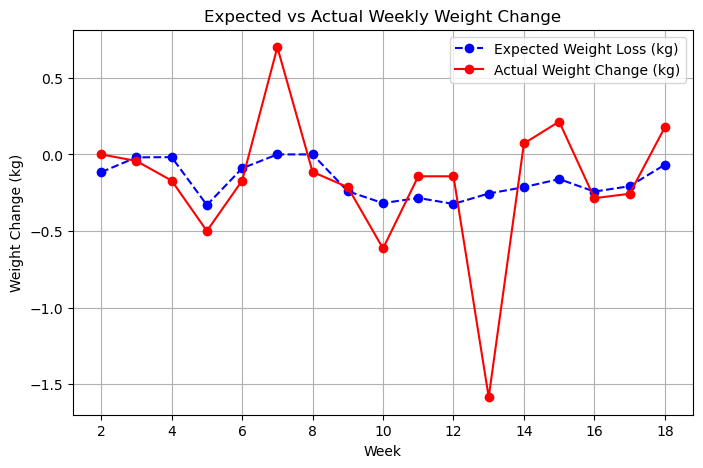

In [364]:
import matplotlib.pyplot as plt

# Plot expected vs actual weight change
plt.figure(figsize=(8,5))

plt.plot(sum_weekly["My Week"], sum_weekly["expected_weight_loss"], marker="o", linestyle="--", color="blue", label="Expected Weight Loss (kg)")
plt.plot(sum_weekly["My Week"], sum_weekly["weight_change"], marker="o", linestyle="-", color="red", label="Actual Weight Change (kg)")

plt.xlabel("Week")
plt.ylabel("Weight Change (kg)")
plt.title("Expected vs Actual Weekly Weight Change")
plt.legend()
plt.grid(True)
plt.show()


Weekly calorie deficit partially predicts weight loss. The correlation is moderate (r = 0.518, p = 0.033), indicating that **higher weekly deficits** tend to produce more weight loss.

Comparing expected vs actual weight change shows that, while most weeks follow the expected trend, there are deviations likely caused by 
- natural weight fluctuations,
- water retention, or
- other factors.

Overall, maintaining a weekly calorie deficit is an effective strategy for weight loss, but short-term weekly variations may occur.

## 8.1   Does monthly calorie deficit actually predict weight loss (here we reduce the noice)?

In [411]:
df.columns

Index(['Date', 'Monthly', 'My Week', 'Planned the day', 'Workout',
       'Diet followed', 'JOURNAL', 'Sleep in H', 'Sleep in Desc',
       'Deep work (h) in T', 'Deep work (h) in Des', 'Steps',
       'Daily weight (kg)', 'CD Goal Weekly', 'CD Reality Check',
       'Calory Deficit ', 'Screen Time (h)', 'Screen Time in Dec', 'SE',
       'PORTUGUESE', 'READ PAGES', 'STATE OF DAY', 'Days of week', 'Body fat%',
       'Real Fat Mass', 'Real Lean Body Mass (LBM)', 'Waist', 'Neck', 'Biceps',
       'Forearms', 'Chest', 'Calves', 'Hips', 'Thighs', 'Sleep Category',
       'Screen Time Category', 'Both_or_Neither'],
      dtype='object')

In [ ]:
df[['Monthly','Calory Deficit ', 'Daily weight (kg)']]

In [435]:
# 1. Calculate weekly weight change

sum_monthly = df.groupby('Monthly').agg( monthly_deficit=("Calory Deficit ", "sum"), avg_weight=('Daily weight (kg)', "mean")).reset_index()
sum_monthly

,Monthly,monthly_deficit,avg_weight
0,August,-9525.0,78.067742
1,July,-3707.0,79.541935
2,June,-3787.0,79.836667
3,September,-5226.0,77.092308


In [437]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

sum_monthly["Monthly"] = pd.Categorical(sum_monthly["Monthly"], categories=month_order, ordered=True)

sum_monthly_sorted = sum_monthly.sort_values("Monthly").reset_index(drop=True)

In [439]:
sum_monthly_sorted

,Monthly,monthly_deficit,avg_weight
0,June,-3787.0,79.836667
1,July,-3707.0,79.541935
2,August,-9525.0,78.067742
3,September,-5226.0,77.092308


In [441]:
#1 Calculate monthly weight change

sum_monthly_sorted["weight_change"] = sum_monthly_sorted["avg_weight"].diff()

#2 Convert deficit → kg-equivalent

sum_monthly_sorted["deficit_kg_equiv"] = sum_monthly_sorted["monthly_deficit"] / 7700

In [465]:
sum_monthly_sorted["gap_kg"] = sum_monthly_sorted["weight_change"] - sum_monthly_sorted["deficit_kg_equiv"]

In [467]:
sum_monthly_sorted

,Monthly,monthly_deficit,avg_weight,weight_change,deficit_kg_equiv,gap_kg
0,June,-3787.0,79.836667,NaN,-0.491818,NaN
1,July,-3707.0,79.541935,-0.294731,-0.481429,0.186697
2,August,-9525.0,78.067742,-1.474194,-1.237013,-0.237181
3,September,-5226.0,77.092308,-0.975434,-0.678701,-0.296733


In [469]:
sum_monthly_sorted[['Monthly','monthly_deficit','deficit_kg_equiv','avg_weight','weight_change','gap_kg']].round(3)

,Monthly,monthly_deficit,deficit_kg_equiv,avg_weight,weight_change,gap_kg
0,June,-3787.0,-0.492,79.837,NaN,NaN
1,July,-3707.0,-0.481,79.542,-0.295,0.187
2,August,-9525.0,-1.237,78.068,-1.474,-0.237
3,September,-5226.0,-0.679,77.092,-0.975,-0.297
